In [1]:
from fastbook import *

In [2]:
urls = search_images_ddg('bird photos', max_images=1)
len(urls),urls[0]

(1,
 'http://2.bp.blogspot.com/-GYuWcziFBeg/UfFIfusrDyI/AAAAAAAADzU/3rmb1cK4b2Q/s1600/kingfisher_Lovely_Bird.jpg')

In [3]:
dest = Path('bird.jpg')
if not dest.exists(): download_url(urls[0],show_progress=False)

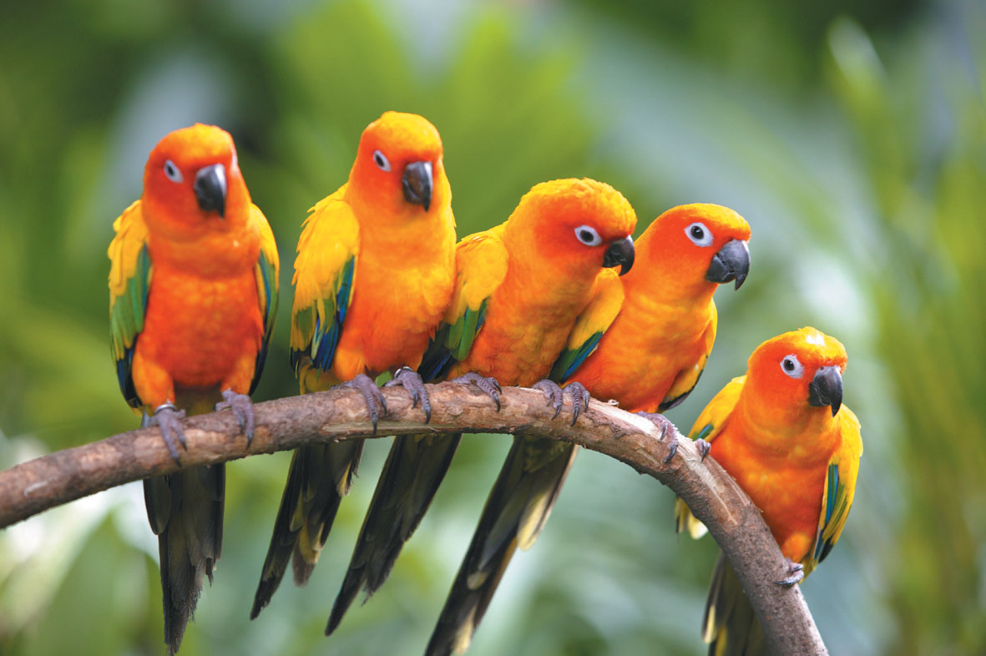

In [4]:
im =Image.open(dest)
im.to_thumb(656,1080)

In [5]:
from fastdownload import download_url
download_url(urls[0], dest, show_progress=False)

Path('bird.jpg')

In [6]:
download_url(search_images_ddg('forest photos',max_images=1)[0],'forest.jpg',
             show_progress=False,
             )

Path('forest.jpg')

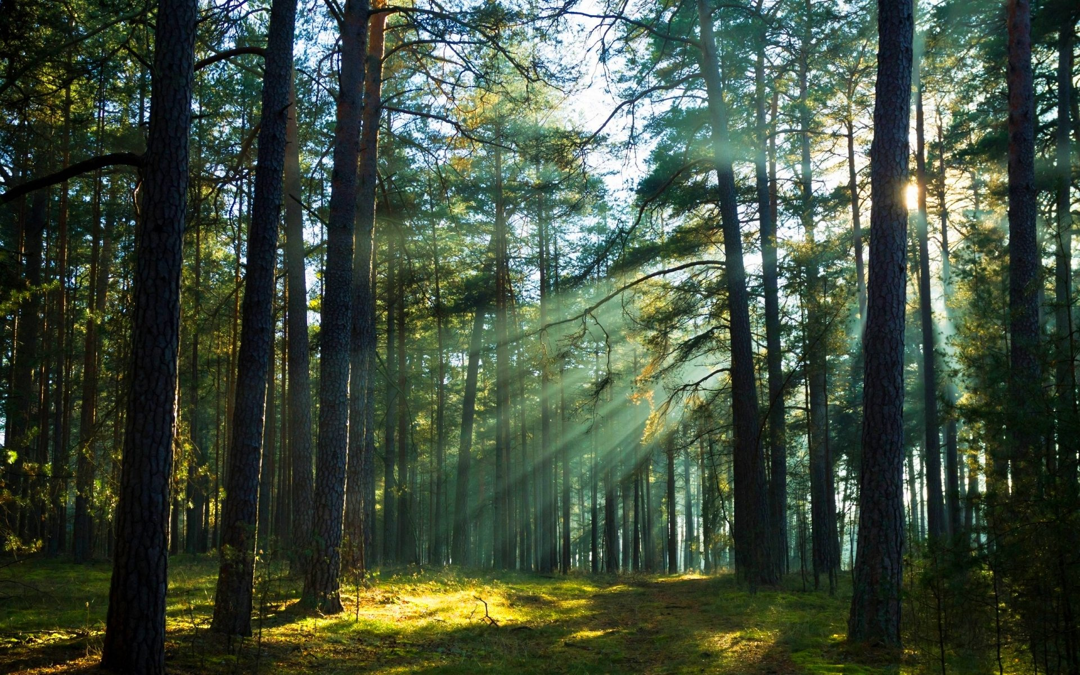

In [7]:
Image.open('forest.jpg').to_thumb(1080,1080)

In [12]:
searches = 'forest','bird'
path = Path('bird_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images_ddg(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images_ddg(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images_ddg(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

In [13]:
failed=verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

43

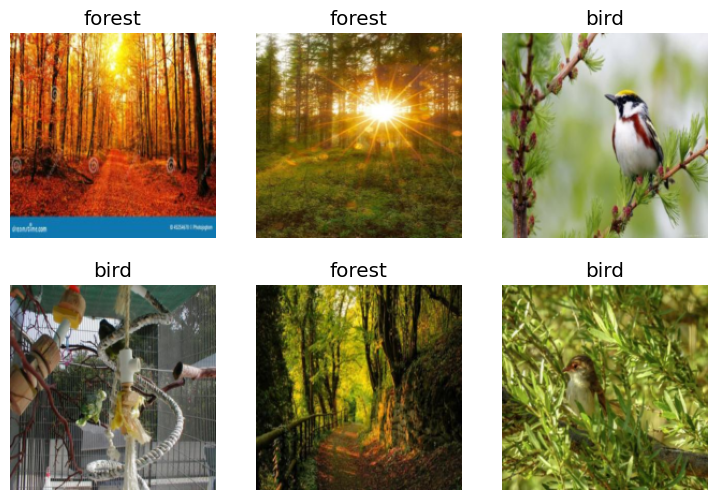

In [16]:
dls = DataBlock(
 blocks=(ImageBlock,CategoryBlock),
 get_items=get_image_files,
 splitter=RandomSplitter(valid_pct=0.2,seed=42),
 get_y=parent_label,
 item_tfms=[Resize(192,method='squish')]
).dataloaders(path,bs=32)

dls.show_batch(max_n=6)

In [17]:
blocks=(ImageBlock,CategoryBlock),

In [18]:
get_items=get_image_files,

In [19]:
splitter=RandomSplitter(valid_pct=0.2,seed=42),

In [20]:
get_y=parent_label,

In [21]:
item_tfms=[Resize(192,method='squish')]

In [22]:
learn=vision_learner(dls,resnet18, metrics=error_rate)
learn.fine_tune(3)

c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\Hp/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:32<00:00, 1.42MB/s]


In [26]:
is_bird,_,probs=learn.predict(PILImage.create('bird.jpg'))
print(f'This is a:{is_bird}.') 
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a:bird.
Probability it's a bird: 1.0000
